# Customer Segmentation Based on Google Pay Transaction Behavior

##  Project Overview

This project aims to perform **customer segmentation** on a dataset derived from Google Pay users' transactional and credit behaviors. By applying clustering techniques (such as KMeans) and dimensionality reduction (PCA), we identify distinct customer groups with shared financial and usage characteristics.

The primary business goal is to enable **data-driven decision-making for personalized marketing, risk control, and customer lifecycle management**. Understanding the behavioral patterns of different user segments can help:

- **Target high-value users** with tailored rewards and retention strategies.
- **Re-engage low-activity users** through nudges and promotional campaigns.
- **Identify newly onboarded or dormant users** who may need activation support.
- **Flag financially risky users** for credit monitoring or intervention.

##  Key Techniques

- **Data Cleaning & Imputation**: Handling various missing value markers and using hybrid strategies (median and KNN) for imputation.
- **Feature Engineering**: Selection of 7 key behavioral and financial indicators, such as balance, purchases, payments, and tenure.
- **Clustering**: Evaluation of optimal number of clusters using the Elbow Method, Silhouette Score, and other internal metrics.
- **Cluster Profiling**: Heatmap and radar chart visualizations to interpret segment characteristics.
- **PCA Visualization**: Reducing high-dimensional user behavior into 2D space for intuitive understanding.
- **Export**: Saving cluster results as separate CSVs and a color-coded Excel file for stakeholder consumption.

##  Outcome

The final segmentation identified 5 distinct user groups, including:
- **High-value active users**
- **Financially risky users**
- **Low-engagement or passive users**
- **New or inactive users**
- **Creditworthy but quiet users**

These insights can be used to **drive retention, reduce credit risk**, and support **more personalized customer engagement** strategies.

---


In [136]:
import numpy as np

In [137]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'F:\360MoveData\Users\GiGi\Desktop\Customer Segmentation.csv'
data = pd.read_csv(file_path)

In [138]:
# Display initial dataset information
print("First 5 rows of the dataset:")
display(data.head())

print("General info about the dataset:")
data.info()


First 5 rows of the dataset:


,ID000UST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,ID00010001,48,1,95,-,95,-,0,-,0,-,-,2,"1,000",202,140,-,12
1,ID00010002,5932,1,-,-,-,"6,443",-,-,-,0,4,-,"7,000","4,103","1,072",0,12
2,ID00010003,4520,1,773,773,-,-,1,1,-,-,-,12,"7,500",622,627,-,12
3,ID00010004,1718,1,"1,499","1,499",-,206,0,0,-,0,1,1,"7,500",-,NaN,-,12
4,ID00010005,1410,1,16,16,-,-,0,0,-,-,-,1,"1,200",678,245,-,12


General info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ID000UST_ID                       8950 non-null   object
 1   BALANCE                           8950 non-null   object
 2   BALANCE_FREQUENCY                 8950 non-null   object
 3   PURCHASES                         8950 non-null   object
 4   ONEOFF_PURCHASES                  8950 non-null   object
 5   INSTALLMENTS_PURCHASES            8950 non-null   object
 6   CASH_ADVANCE                      8950 non-null   object
 7   PURCHASES_FREQUENCY               8950 non-null   object
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   object
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   object
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   object
 11  CASH_ADVANCE_TRX                  8950 non-null   

In [139]:
# Replace common missing value indicators with NaN
missing_values_markers = ['-', '--', '#VALUE!', ' ', '', 'NA', 'null']
data.replace(missing_values_markers, np.nan, inplace=True)

# Convert numeric columns to float after removing commas
numeric_cols = data.columns.drop(['ID000UST_ID', 'TENURE'])  # Exclude ID and TENURE
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col].str.replace(',', '', regex=False), errors='coerce')

# Display data types after conversion
print(data.dtypes)

# Display missing values after cleaning
missing_values = data.isnull().sum()
print("Missing values after cleaning:")
print(missing_values[missing_values > 0])

# Display missing value ratio
missing_ratio = data.isnull().sum() / len(data)
print("Missing_ratio after cleaning:")
print(missing_ratio.sort_values(ascending=False))

# Display preview after cleaning
print("\nFirst few rows after cleaning:")
print(data.head())

ID000UST_ID                          object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object
Missing values after cleaning:
BALANCE                               80
BALANCE_FREQUENCY                     80
PURCHASES                           2044
ONEOFF_PURCHASES                    4302

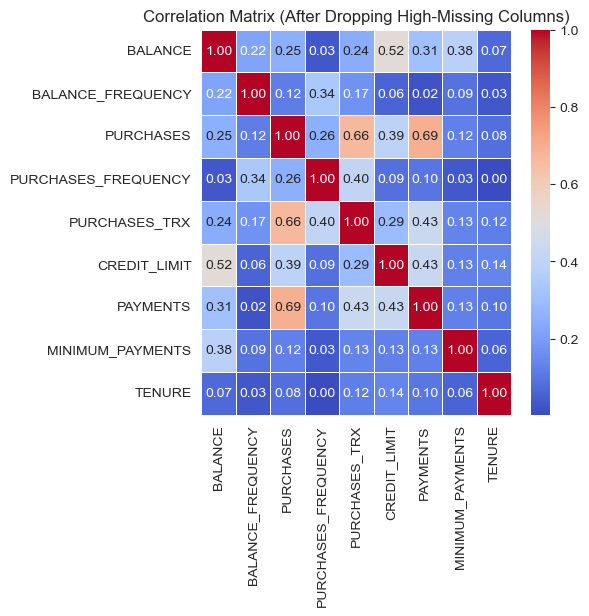

In [140]:
# Drop columns with more than 40% missing values
threshold = 0.4
cols_to_drop = missing_ratio[missing_ratio > threshold].index
data_reduced = data.drop(columns=cols_to_drop)

# Select only numeric columns for correlation analysis
numeric_data = data_reduced.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_data.corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (After Dropping High-Missing Columns)")
plt.show()



###  Key Observations:

- **`PURCHASES` vs `PURCHASES_TRX`**: High correlation of **0.66**, which makes sense since they represent total amount and frequency of purchases. Despite the correlation, both were retained as they describe **complementary aspects** of spending behavior: **amount** vs **frequency**.

- **`BALANCE` vs `CREDIT_LIMIT`**: Correlation of **0.52**, indicating a moderate relationship—customers with higher limits tend to carry higher balances. Both are retained to reflect **credit utilization** behavior.

- **`PURCHASES` vs `PAYMENTS`**: A relatively high correlation of **0.69**, suggesting customers who spend more also repay more. However, these two features still represent distinct behaviors (spending vs repayment), so both are kept.

- **Low correlations (< 0.3)**: Most other pairs show low correlations, indicating that the selected features provide **diverse and independent information** about user behavior.

- **`TENURE`** shows minimal correlation with other features, but it is retained for its **temporal significance** in representing customer lifecycle stage.

###  Conclusion:

Although a few variables are moderately correlated, each contributes uniquely to the understanding of customer behavior. Therefore, **no features are dropped solely based on correlation**, and the chosen 7 features are all included for clustering.


## Selected Feature Explanation


| Feature Name         | Business Meaning                                                                 |
|----------------------|----------------------------------------------------------------------------------|
| **BALANCE**          | Current outstanding balance on the user's Google Pay account. High values may indicate frequent usage, or potential risk if not paired with timely payments. |
| **PURCHASES**        | Total monetary value of purchases made by the customer. Reflects overall spending power and transactional intent. |
| **PURCHASES_TRX**    | Number of purchase transactions. Complements `PURCHASES` by indicating frequency rather than volume. |
| **CREDIT_LIMIT**     | The maximum amount of credit available to the user. Often reflects a customer's creditworthiness and financial trust level. |
| **PAYMENTS**         | Total amount paid by the customer. Higher values indicate good repayment behavior and potentially lower credit risk. |
| **MINIMUM_PAYMENTS** | Minimum payment required (historically). Large values here—especially compared to `PAYMENTS`—may suggest the customer is at risk of only making minimum repayments. |
| **TENURE**           | Duration (in months) since the user started using the platform. Indicates lifecycle stage—e.g., new, mid-term, or long-term user. |


- These indicators together capture multiple facets of a customer's financial behavior:
  -  **Spending habits** (via PURCHASES and PURCHASES_TRX)
  -  **Credit utilization and trust** (via BALANCE and CREDIT_LIMIT)
  -  **Repayment ability and risk** (via PAYMENTS and MINIMUM_PAYMENTS)
  -  **Lifecycle stage** (via TENURE)


In [141]:
from sklearn.impute import SimpleImputer, KNNImputer

# Manually select relevant features based on domain knowledge and correlation
selected_features = [
    'BALANCE',
    'PURCHASES',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    'TENURE'
]
data_selected = data[selected_features].copy()

# Calculate missing value ratio for selected features
missing_ratio = data_selected.isnull().mean()
print("Missing Ratio:")
print(missing_ratio)

# Split features based on missing ratio threshold
low_missing_features = missing_ratio[missing_ratio < 0.1].index.tolist()
high_missing_features = missing_ratio[missing_ratio >= 0.1].index.tolist()

# Impute low-missing features with median
if low_missing_features:
    imputer_mean = SimpleImputer(strategy='median')
    data_selected[low_missing_features] = imputer_mean.fit_transform(data_selected[low_missing_features])

# Impute high-missing features using KNN
if high_missing_features:
    imputer_knn = KNNImputer(n_neighbors=5)
    data_selected[high_missing_features] = imputer_knn.fit_transform(data_selected[high_missing_features])

# Confirm imputation
print("\nRemaining Missing Values:")
print(data_selected.isnull().sum())


Missing Ratio:
BALANCE             0.008939
PURCHASES           0.228380
PURCHASES_TRX       0.228380
CREDIT_LIMIT        0.000112
PAYMENTS            0.026816
MINIMUM_PAYMENTS    0.034972
TENURE              0.000000
dtype: float64

Remaining Missing Values:
BALANCE             0
PURCHASES           0
PURCHASES_TRX       0
CREDIT_LIMIT        0
PAYMENTS            0
MINIMUM_PAYMENTS    0
TENURE              0
dtype: int64


##  Missing Value Imputation Strategy

The dataset contains missing values across multiple features. To ensure the integrity and usability of the data without introducing bias, a **hybrid imputation strategy** was applied based on the proportion of missing values in each column.

###  Strategy Overview

-  **Median Imputation** for features with **<10% missing values**:
  - These features are mostly complete, and median is a robust central tendency metric that resists the effect of outliers.
  - Suitable for numeric columns with slightly skewed distributions (e.g., `BALANCE`, `PURCHASES`).

-  **K-Nearest Neighbors (KNN) Imputation** for features with **≥10% missing values**:
  - KNN uses similarity across other features to estimate missing values, preserving natural variance and inter-feature relationships.
  - Applied to columns with more significant missingness, such as `MINIMUM_PAYMENTS`, where imputing with a constant could oversimplify behavior.



In [142]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

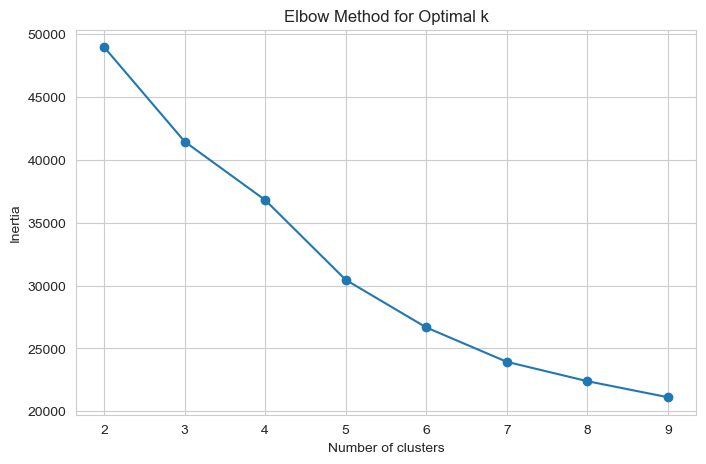

In [143]:
# Elbow Method for optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


###  Insights from This Plot:

- A noticeable **bend (elbow)** appears at **k = 4** and possibly also at **k = 5**.
- After **k = 5**, the rate of inertia reduction **significantly slows**, suggesting that additional clusters may **not provide substantial segmentation benefit**.

###  Conclusion:

- Based on the elbow point, **k = 4 or 5** are both reasonable candidates for further analysis.
- To confirm this choice, additional internal validation metrics such as **Silhouette Score**, **Calinski-Harabasz Index**, and **Davies-Bouldin Score** will also be considered.


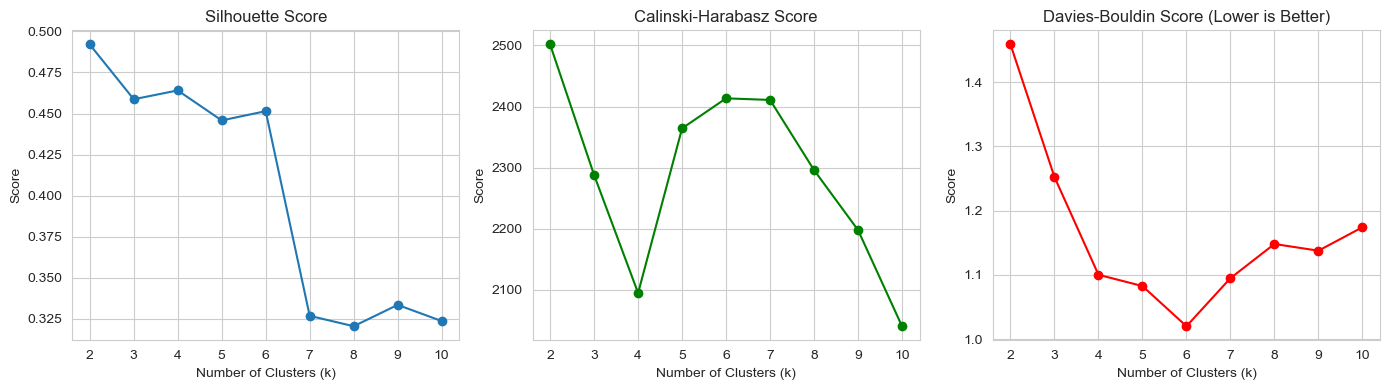

In [144]:
# Evaluate multiple cluster validity scores

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

silhouette_scores = []
ch_scores = []
db_scores = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)

    silhouette = silhouette_score(data_scaled, labels)
    ch = calinski_harabasz_score(data_scaled, labels)
    db = davies_bouldin_score(data_scaled, labels)

    silhouette_scores.append(silhouette)
    ch_scores.append(ch)
    db_scores.append(db)

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, ch_scores, marker='o', color='green')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_range, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Score (Lower is Better)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)

plt.tight_layout()
plt.show()



###  **Silhouette Score** (Higher is better)

- Measures **cluster cohesion and separation**: how similar points are within a cluster vs. to other clusters.
- Peaks at **k = 2**, but this results in very coarse segmentation and may lack actionable business insight.
- Remains relatively **stable between k = 3 to 6**, with a **reasonable value at k = 5 (≈ 0.45)**.

###  **Calinski-Harabasz Index** (Higher is better)

- Measures the **ratio of between-cluster dispersion to within-cluster dispersion**.
- After dipping at k = 4, it increases again and reaches a **local peak at k = 6**.
- However, **k = 5** achieves a strong balance before overfitting begins.

###  **Davies-Bouldin Score** (Lower is better)

- Quantifies average similarity between each cluster and its most similar one (lower is better).
- **Minimum score is at k = 6**, but **k = 5 is very close**, indicating tight and well-separated clusters.

---

###  Final Decision: `k = 5`

Considering all three metrics along with the elbow curve:

- **k = 5** offers a balance between:
  - Reasonable silhouette score
  - Strong Calinski-Harabasz index
  - Low Davies-Bouldin score
- It also aligns well with **business needs**, offering sufficient granularity to differentiate user segments without making the model overly complex.

> Therefore, we proceed with `k = 5` as the optimal number of clusters for customer segmentation.



In [145]:
# Perform KMeans clustering using chosen k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [146]:
data_selected['Cluster'] = clusters
print(data_selected.head())

   BALANCE   PURCHASES  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0     48.0    95.00000       2.000000        1000.0     202.0   
1   5932.0  1300.14234      19.063568        7000.0    4103.0   
2   4520.0   773.00000      12.000000        7500.0     622.0   
3   1718.0  1499.00000       1.000000        7500.0     890.0   
4   1410.0    16.00000       1.000000        1200.0     678.0   

   MINIMUM_PAYMENTS  TENURE  Cluster  
0             140.0    12.0        1  
1            1072.0    12.0        0  
2             627.0    12.0        1  
3             312.0    12.0        1  
4             245.0    12.0        1  


Cluster Means:
             BALANCE     PURCHASES  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
Cluster                                                                         
0        6205.389618   2198.572115      31.298147   9117.800913   3684.891044   
1        1286.327400    882.285812      14.409992   3278.070566   1086.244755   
2        1452.716578    864.373211      12.043123   2708.894385    773.672460   
3        6415.250000   1283.110585      24.365892   4728.750000   1874.650000   
4        6739.931624  13075.549442     128.761770  11959.829060  15190.350427   

         MINIMUM_PAYMENTS     TENURE  
Cluster                               
0             1548.944096  11.895037  
1              512.508900  11.887317  
2              376.133690   7.427807  
3            26783.200000  11.900000  
4             2300.042735  11.974359  


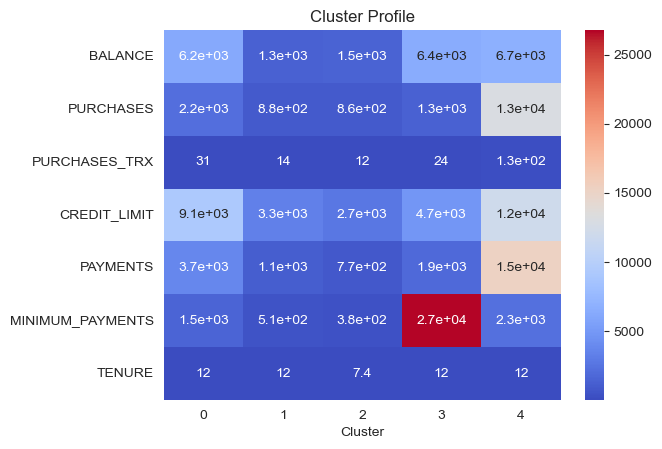

In [147]:
# Calculate mean values per cluster
cluster_means = data_selected.groupby('Cluster')[selected_features].mean()
print("Cluster Means:")
print(cluster_means)

# Visualize cluster profiles using heatmap
import seaborn as sns
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm')
plt.title("Cluster Profile")
plt.show()

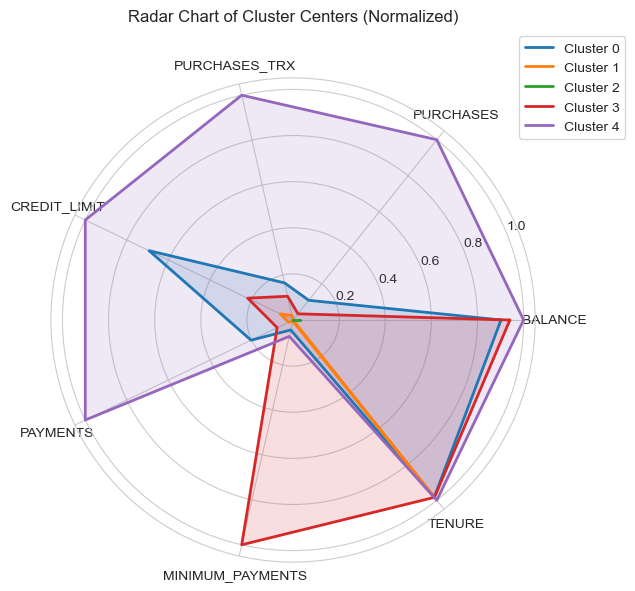

In [148]:
import matplotlib.pyplot as plt
import numpy as np

features = selected_features
cluster_means = data_selected.groupby('Cluster')[features].mean()

# Normalize cluster centers for radar chart visualization
cluster_means_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Setup radar chart
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'polar': True})

for idx in cluster_means_norm.index:
    values = cluster_means_norm.loc[idx].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {idx}', linewidth=2)
    ax.fill(angles, values, alpha=0.15)

ax.set_thetagrids(np.degrees(angles[:-1]), features)
plt.title('Radar Chart of Cluster Centers (Normalized)', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

##  Customer Segmentation Summary (k = 5)

Based on KMeans clustering with **k = 5**, I identified five distinct customer segments using seven key behavioral and financial indicators from Google Pay usage data.

###  Segment Interpretations

| Cluster | Key Characteristics                                                                                   | Suggested Label               |
|---------|--------------------------------------------------------------------------------------------------------|--------------------------------|
| **0**   | Moderate balance and purchases, mid-level credit, slightly above-average in most features.             | **Mid-tier Balanced Users**   |
| **1**   | Lowest across nearly all metrics – low balance, low activity, low credit, low tenure.                 | **New or Dormant Users**      |
| **2**   | Low-to-mid activity but stable tenure and behavior; minimal risk or engagement.                       | **Passive but Stable Users**  |
| **3**   | Moderate metrics overall, but **exceptionally high minimum payments** – likely a financial outlier.   | **Financially Risky Users**   |
| **4**   | Clearly dominant in **every feature** – highest purchases, transactions, credit, and repayment.       | **High-value Power Users**    |

---

###  Key Takeaway

- **Cluster 4 – High-value Power Users**: The most engaged, financially strong customers. Prioritize them for **exclusive offers**, **premium features**, or **retention strategies**.

- **Cluster 3 – Financially Risky Users**: Extremely high minimum payments suggest repayment pressure. Consider **risk flagging**, **credit interventions**, or **targeted support**.

- **Cluster 1 & 2 – Low-Engagement Users**: Both clusters exhibit very low balances, purchases, and tenure. Likely represent **new, inactive, or disengaged users**. Ideal targets for **re-onboarding campaigns** or **engagement nudges**.

- **Cluster 0 – Balanced Mid-tier Users**: A stable and healthy group with moderate values across all dimensions. Could be nurtured further with **growth incentives** to convert into high-value users.

---

>  These segments can be used to tailor marketing, customer support, and risk management strategies, ultimately leading to more personalized and effective user engagement.



In [152]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Define updated labels and insights for k = 5 clusters
cluster_labels = [
    'Mid-tier Balanced Users',
    'New or Dormant Users',
    'Passive but Stable Users',
    'Financially Risky Users',
    'High-value Power Users'
]

# Corresponding insights aligned with the heatmap and radar chart
profile_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4],
    'Label': cluster_labels,
    'Key Insight': [
        'Moderate usage across all metrics; stable and balanced users',
        'Very low usage in all dimensions; likely new or inactive users',
        'Low activity but consistent behavior and stable tenure',
        'Moderate metrics but extremely high minimum payments (potential financial risk)',
        'Outstanding values in all metrics; highly engaged and financially strong users'
    ]
})

# Set cluster as index and display
profile_summary.set_index('Cluster', inplace=True)
display(profile_summary)



,Label,Key Insight
Cluster,,
0,Mid-tier Balanced Users,Moderate usage across all metrics; stable and balanced users
1,New or Dormant Users,Very low usage in all dimensions; likely new or inactive users
2,Passive but Stable Users,Low activity but consistent behavior and stable tenure
3,Financially Risky Users,Moderate metrics but extremely high minimum payments (potential financial risk)
4,High-value Power Users,Outstanding values in all metrics; highly engaged and financially strong users


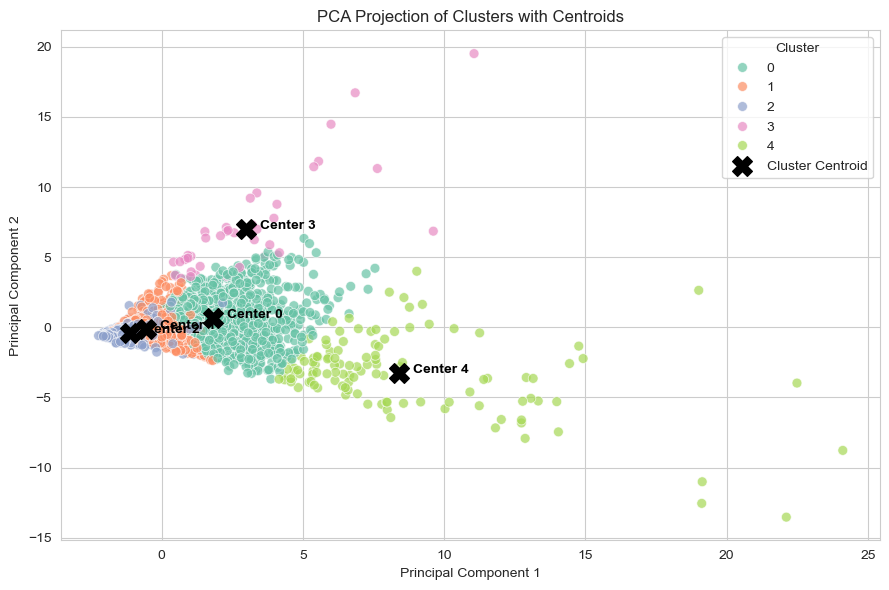

In [150]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Perform PCA for 2D visualization of clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

pca_df = data_selected.copy()
pca_df['PCA1'] = pca_components[:, 0]
pca_df['PCA2'] = pca_components[:, 1]

# Compute cluster centroids in PCA space
cluster_centers = []
for i in sorted(pca_df['Cluster'].unique()):
    group = pca_df[pca_df['Cluster'] == i]
    center = [group['PCA1'].mean(), group['PCA2'].mean()]
    cluster_centers.append(center)
cluster_centers = np.array(cluster_centers)

plt.figure(figsize=(9, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=pca_df,
    palette='Set2',
    s=50, alpha=0.7
)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            s=200, c='black', marker='X', label='Cluster Centroid')

for i, (x, y) in enumerate(cluster_centers):
    plt.text(x + 0.5, y, f'Center {i}', fontsize=10, weight='bold', color='black')

plt.title('PCA Projection of Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


##  PCA Projection of Customer Segments (k = 5)

To visually assess the **separation and compactness** of the customer clusters derived from KMeans, we performed **Principal Component Analysis (PCA)** to reduce the 7-dimensional feature space into 2D for plotting.

###  Key Observations:

- **Cluster 4 (light green)** is clearly separated on the far right of the plot, indicating that these users have **distinctively different behavioral patterns** — which aligns with them being **High-value Power Users** with strong financial and transactional activity.

- **Cluster 3 (pink)** appears well-separated in the **upper-middle region**, forming a tight group. This matches the **Financially Risky Users** with unusually high `MINIMUM_PAYMENTS`.

- **Cluster 0 (teal)** is densely populated near the center, showing **moderate and balanced behaviors**, aligning with **Mid-tier Balanced Users**.

- **Cluster 1 (orange)** and **Cluster 2 (purple)** partially overlap and are both located on the **left side of the PCA space**, suggesting they represent similar behavioral patterns — which matches their characterization as **New/Dormant** and **Passive but Stable Users**.

---

###  Insights:

- PCA projection **validates** that the clustering captured meaningful behavioral groupings:
  - High-value and risky users form **clearly isolated clusters**.
  - Low-engagement users form **tighter, overlapping clusters** that may need further segmentation refinement.

- The **compactness of most clusters** indicates good intra-group similarity, while the **distance between centroids** indicates clear inter-group differences.


In [151]:
# Export results per cluster and colored Excel file
import pandas as pd
import os
import seaborn as sns
from openpyxl import load_workbook
from openpyxl.styles import PatternFill
from matplotlib.colors import to_hex

cluster_label_map = {
    0: 'Creditworthy Passive Users',
    1: 'Low-engagement Users',
    2: 'New or Inactive Users',
    3: 'Financially Risky Users',
    4: 'High-value Active Users'
}

data_export = data_selected.copy()
data_export['Cluster_Label'] = data_export['Cluster'].map(cluster_label_map)

# Export individual CSVs
output_dir = './cluster_outputs'
os.makedirs(output_dir, exist_ok=True)

for cluster_id in sorted(data_export['Cluster'].unique()):
    cluster_df = data_export[data_export['Cluster'] == cluster_id]
    filename = f'{output_dir}/cluster_{cluster_id}.csv'
    cluster_df.to_csv(filename, index=False)

print(f" Individual cluster CSVs saved to: {output_dir}")

# Export Excel with color highlighting
excel_path = './clustered_customers_colored.xlsx'
data_export.to_excel(excel_path, index=False)

wb = load_workbook(excel_path)
ws = wb.active

color_palette = sns.color_palette("Set2", n_colors=data_export['Cluster'].nunique())
hex_colors = [to_hex(c) for c in color_palette]

label_colors = {
    label: PatternFill(start_color=hex_color[1:], end_color=hex_color[1:], fill_type="solid")
    for label, hex_color in zip(data_export['Cluster_Label'].unique(), hex_colors)
}

label_col_letter = chr(65 + data_export.shape[1] - 1)
for row in range(2, ws.max_row + 1):
    label = ws[f'{label_col_letter}{row}'].value
    fill = label_colors.get(label, None)
    if fill:
        for col in range(1, data_export.shape[1] + 1):
            ws.cell(row=row, column=col).fill = fill

wb.save(excel_path)
print(f" Colored Excel saved to: {excel_path}")


PermissionError: [Errno 13] Permission denied: './cluster_outputs/cluster_0.csv'